<a href="https://colab.research.google.com/github/kings-md1/Data-Science/blob/main/iris_model_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.data.dataset import random_split
from sklearn.model_selection import train_test_split

# Simple Linear Regression

Text(0, 0.5, 'y')

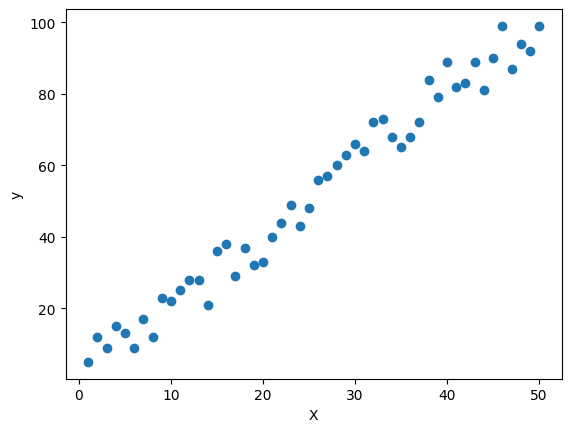

In [9]:
torch.manual_seed(71)

X = torch.linspace(1, 50, 50).reshape(-1, 1)

# noise
e = torch.randint(-8, 9, (50, 1), dtype= torch.float)

y = 2 * X + 1 + e

plt.scatter(X.detach(), y.detach())
plt.xlabel("X")
plt.ylabel("y")

In [10]:
# Define a class for the model
class Model(nn.Module):

  def __init__(self, in_features, out_features):

    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [11]:
torch.manual_seed(59)

# Create an instance of the class
model = Model(1, 1)

print("weight", model.linear.weight.item())
print("bias", model.linear.bias.item())

weight 0.10597813129425049
bias 0.9637961387634277


In [12]:
# Iterating over the parameters
for name, param in model.named_parameters():
  print(name, "\t", param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [13]:
# Loss Function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=.05 )

# Datasets with PyTorch

In [14]:
 df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


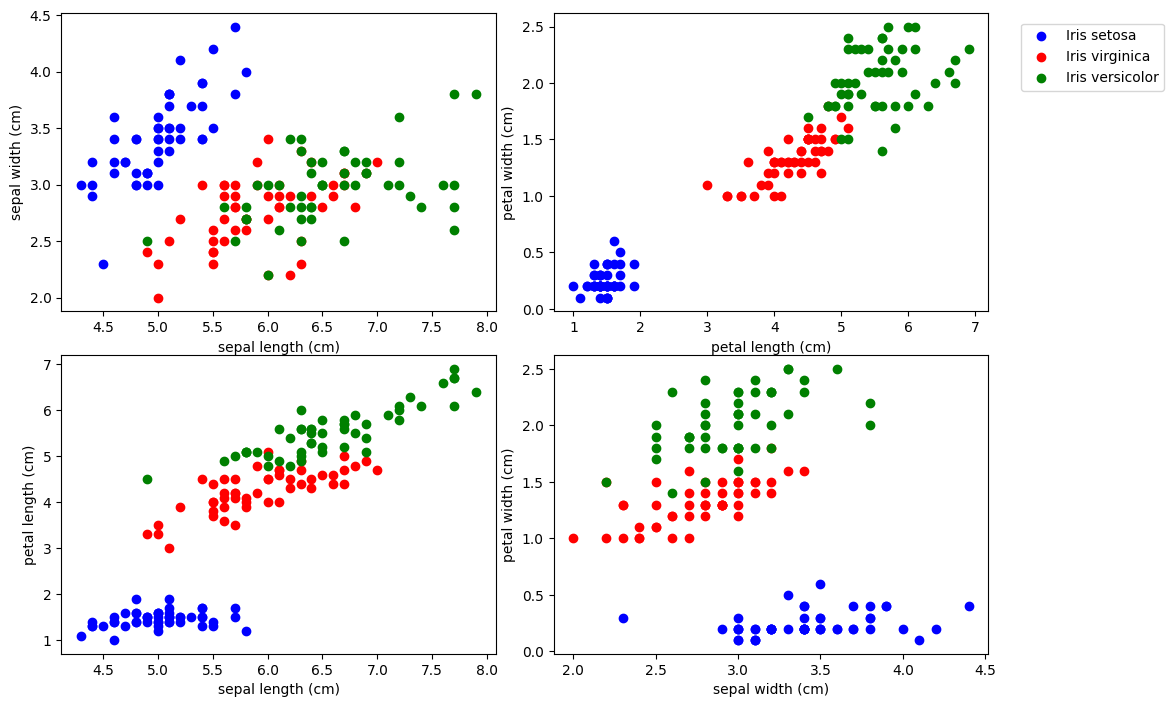

In [15]:
# Let's plot the above data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [16]:
# Separate into features and labels but grab only the values
features = df.drop("target", axis=1).values
labels = df["target"].values

In [17]:
# Splitting into train and test split using scikit learn
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=33)

In [18]:
# Let's convert the numpy arrays to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [19]:
# Splitting using pytorch built in DataLoader and TensorDataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [20]:
data = df.drop(columns= ["target"]).values
labels = df["target"].values

In [21]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

type(iris)

torch.utils.data.dataset.TensorDataset

In [22]:
for i in iris:
  print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

# The above shows that the tensor called iris now contains both the features and the labels as different tensors. We use DataLoader to shuffle and separate into batches

In [23]:
# Using the dataloader
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)

In [24]:
for batch in enumerate(iris_loader):
  print(batch)

(0, [tensor([[5.1000, 3.8000, 1.9000, 0.4000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.2000, 2.9000, 4.30

# Basic PyTorch ANN

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

In [13]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# The above shows 4 features and one target column

In [14]:
# Create a class for our model
class Model(nn.Module):

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [15]:
torch.manual_seed(32)

model = Model() # Nothing was specified here bcos we already specified the input and out
                # as keyword arguments in the class


In [16]:
X = df.drop(columns= ["target"]).values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=33)

# Let's convert the above into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
# Defining the loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=.01)

In [18]:
# Train the model
numepochs = 100
losses = torch.zeros(numepochs)

for epoch in range(numepochs):

  # Forward pass
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses[epoch] = loss

  if epoch % 10 == 0:
    print(f"for {epoch} epochs, the loss is {loss}")

  # Optimizer
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

for 0 epochs, the loss is 1.1507114171981812
for 10 epochs, the loss is 0.9377315044403076
for 20 epochs, the loss is 0.7798256278038025
for 30 epochs, the loss is 0.6099401712417603
for 40 epochs, the loss is 0.40079930424690247
for 50 epochs, the loss is 0.25436317920684814
for 60 epochs, the loss is 0.15053048729896545
for 70 epochs, the loss is 0.10086944699287415
for 80 epochs, the loss is 0.08128313720226288
for 90 epochs, the loss is 0.07231426984071732


Text(0, 0.5, 'Losses')

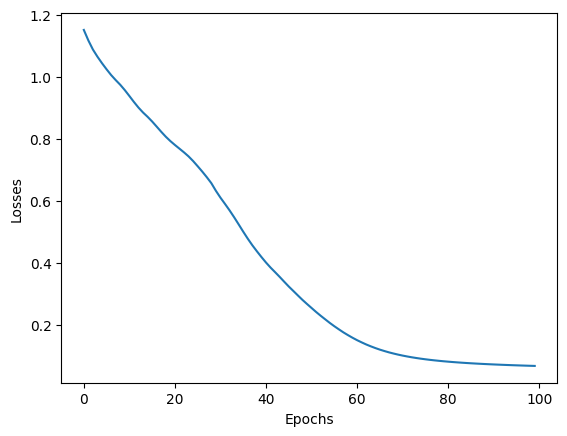

In [19]:
# Let's plot the loss vs the epoch and see how well we performed
plt.plot(losses.detach())
plt.xlabel("Epochs")
plt.ylabel("Losses")

In [22]:
# Evaluating the model performance
with torch.no_grad():

  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(0.0581)

In [27]:
# To print out the result
correct = 0

with torch.no_grad():

  for i, data in enumerate(X_test):

    y_val = model.forward(data)

    print(f"{i+1}.)  {str(y_val)} class {y_test[i]}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We got {correct} correct")

1.)  tensor([-2.1252,  4.8064, -0.8628]) class 1
2.)  tensor([-1.7985,  5.3098, -1.5449]) class 1
3.)  tensor([  6.3542,   0.8438, -10.0541]) class 0
4.)  tensor([-3.9123,  4.5958,  1.1693]) class 1
5.)  tensor([-7.4713,  3.2021,  5.7853]) class 2
6.)  tensor([-10.4976,   1.6459,   9.6297]) class 2
7.)  tensor([  6.3201,   0.9917, -10.1532]) class 0
8.)  tensor([  7.0468,   0.7059, -10.9137]) class 0
9.)  tensor([-7.2061,  3.3477,  5.3565]) class 2
10.)  tensor([-9.3960,  2.5759,  8.1033]) class 2
11.)  tensor([-9.8808,  2.3475,  8.7141]) class 2
12.)  tensor([ 6.2748,  0.6655, -9.7613]) class 0
13.)  tensor([-9.3142,  2.1880,  8.1947]) class 2
14.)  tensor([-3.7803,  4.5050,  1.0752]) class 1
15.)  tensor([-7.8657,  3.0117,  6.2303]) class 2
16.)  tensor([-1.8867,  5.1572, -1.3345]) class 1
17.)  tensor([-5.7006,  3.5030,  3.6696]) class 2
18.)  tensor([  7.1789,   0.7369, -11.1350]) class 0
19.)  tensor([-3.2944,  4.7931,  0.3475]) class 1
20.)  tensor([-7.7665,  3.7629,  5.7095]) cl

In [29]:
# Saving training model to file
torch.save(model.state_dict(), "my_iris_model.pt")

'/content'